# Two sum (three solutions)

*Michael Snowden*, 25 January 2024, last updated 16 March 2024

In this extended [algorithmic essay](https://dsa-ou.github.io/algoesup/) we aim
to solve the classic [Two Sum](https://leetcode.com/problems/two-sum/) problem
from [LeetCode](https://leetcode.com/). We are going to explore, analyse, and
compare a selection of approaches with the end goal of finding a clear and
efficient solution.

We assume the reader has an intermediate understanding of Python, including
aspects like importing modules, using loops, and applying conditionals.
Furthermore, Big-Oh notation is used to analyse the complexity of our solutions
and we refer to terms such as binary search and brute force.

## 1 Problem

To effectively solve Two Sum, it is crucial we thoroughly understand the
problem. We need to identify the inputs, outputs and the relationship between
them.

Leetcode provides the following problem description.

"*Given an array of integers `nums` and an integer `target`, return indices of the two numbers such
that they add up to target.*"

 - *$-109 \leq$ `nums[i]` $\leq 109$*
 - *$-109 \leq$ `target` $\leq 109$*
 - *Only one valid answer exists.*

We can extract some important information from their description, namely the pre- and post-conditions.

**Preconditions**:
- $-109 \leq$ `nums[i]` $\leq 109$
- $-109 \leq$ `target` $\leq 109$
-  Exactly one pair `a` and `b` in `nums` has `a` + `b` = `target`

**Postconditions**:  

Let `indices` be the output, then:
- `len(indices)` = 2;
- `nums[indices[0]]` + `nums[indices[1]]` = `target`

The preconditions _must_ be satisfied for our algorithms to be defined, and
the postconditions _must_ be satisfied for our algorithms to be correct.

## 2 Algorithms

With our problem defined, the next step is to think of ways to solve it. This
section presents three distinct approaches to solving Two sum: brute force,
sorting and mapping.


### 2.1 Brute force

Generally speaking, a brute force algorithm tries all possibilities, and
selects a correct one. For this problem, the possibilities are all sums that
can be obtained by pairing each number in `nums` with every other number, and
the correct pair is identified if the sum matches `target`. We are checking all
possible sums, so we are sure to find our indices if they exist. Looking back
at the preconditions, we can see that each problem instance must have exactly
one pair that sums to `target`. Hence this approach is guaranteed to find a
solution, as long as our preconditions are met.

Getting _any_ working solution regardless of efficiency can be an important
first step. Sometimes we need to solve a problem quickly, and more importantly
it gets us thinking through it, which can often lead to additional solutions.

>**Brute force algorithm**: An outer loop iterates through each number in
>`nums`, then for each number, an inner loop iterates `nums` again. For each
>pair of numbers, if their indices are different and their sum matches `target`,
>return their indices.

```text
1. for each index_1 from 0 to len(nums)-1:
    1. for each index_2 from 0 to len(nums)-1:
        1. if index_1 != index_2 and nums[index_1] + nums[index_2] == target:
            1. let indices be (index_1, index_2)
            2. stop
```
<br>

Let _n_ = `len(nums)`, then this algorithm has two nested for loops that do _n_
iterations each. The operations performed within the inner loop are constant
time, meaning this solution will do at most _n_ $\times$ _n_ $\times$ O(1)
steps. Thus, the worst-case time complexity is O(_n_ $^2$). In the best-case,
the first and second numbers in `nums` sum to `target`. No matter the size of
`nums`, the run-times would not increase. Therefore, the best-case time
complexity would be O(1).

### 2.2 Sorting

For many computational problems a good question to ask is: will sorting the
inputs simplify the problem and lead to a more efficient solution? In this
case, the answer is yes, we can exploit the properties of a sorted input in a
similar way to binary search. Rather than focusing on the middle of the
sequence and reducing the search space by half, we keep track of the two ends
with position variables and have reduce the search space by one each time.
This kind of approach is commonly referred to as a "double pointer algorithm"
named after the two position variables.

Before we move on to a formal description of the algorithm,  we need to
consider a crucial aspect of the Two Sum problem: it requires _indices_ to be
returned. This has implications for our solution: direct sorting of `nums` is
not possible because the original index positions would be altered. Thus, any
additional data structures we use must keep track of the corresponding indices
from elements of `nums`. Keeping this in mind, here is the description of our
algorithm.

>**With sorting algorithm**: Create a pair `(number, index)` for each number in
>`nums`. Add each pair to a list `pairs`, then sort the list into ascending
>order based on the numbers. Initialise two variables `start` and `end` to be 0
>and `len(nums) - 1` respectively. While `start` $\neq$ `end` sum the numbers in
>`pairs` corresponding to the indices `start` and `end`. If the sum is less than
>`target`, move `start` to the right by incrementing its value by one. If the
>sum is greater than `target`, move `end` to the left by decrementing its value
>by one. If the sum matches `target` then return the indices of both numbers.

The logic of this strategy is as follows. The sum of the numbers at positions
`start` and `end` in our `pairs` list will have one of the following three cases:
the sum can be equal to, greater than or less than `target`. If the sum is
equal to target, then we have found our solution and can return the indices.
If the sum is less than target, we need to increase the value of our sum;
the only way to do this is by moving `start` to the right. Remember we have
sorted the list, so all values to the right are greater. If our sum is
greater than `target` we need to decrease the value of our sum, and the
only way to do that by moving `end` to the left.

```text
1. let pairs be an empty list
2. for each index from 0 to len(nums):
    1. let `pair be (nums[index], index)
    2. append pair to `pairs`
3. let pairs be sorted by value at first index
4. let start = 0
5. let end = len(nums) -1
6. while start != end:
    1. pair_sum = pairs[start][0] + pairs[end][0]
    2. if pairs_sum = target:
        1. let indices be (pairs[start][1], pairs[end][1])
        2. stop
    3. otherwise if pairs_sum > target:
        1. let end = end - 1
    4. otherwise:
        1. let start = start + 1
```
<br>

The important parts of this algorithm with respect analysing time complexity
are: the for loop at step number two, the sorting operation at step number
three and the while loop at step number six.

Let _n_ = `len(nums)`, then the for loop always does _n_ iterations, and we
will assume the sorting operation has worst-case complexity of O(n log(n)) and
best-case of O(n), that just leaves the while loop. The while loop will do at
most _n_ iterations in a scenario where one of the variables `start` or `end`
stays in place and the other is incremented until they are next to each other.

It is clear now that the sorting operation will dominate this approach when it
comes to time complexity. Therefore, this algorithm has an overall worst-case
time complexity of O(n log(n)) and a best-case of O(n).

### 2.3 Mapping

In the previous algorithm we paired each number in `nums` with its index out of
necessity. We wanted to sort `nums` without loosing the original paring of
number to index. This action of pairing numbers to indices is a useful idea;
what if instead of pairing a number directly to its index, we paired the
difference between our number and the target (i.e. `target` - number) to
its index? If we did that, then finding our pair would be a case of checking if
current number is in the pairs list.

This is a good start, but we still have a problem, the lookup operation takes
linear time for a list. We need an alternative data structure, one with much
efficient lookup times. If fast lookup times are required, then we should
always consider a hashtable. This data structure is known informally by many
different names such as dictionary, hashmap, map and associative array. A key
property of this data structure is the lookup operation has constant time
complexity in the average case.

For every number in `nums`, we can map the difference between it and the target
(`target` - number) to its corresponding index using a hashtable. This allows
us to check the hashmap for matching numbers in constant time.

>**Mapping algorithm**: For each number in `nums`, if its in the hashmap, return
>its index and the index mapped to it. Otherwise, calculate the difference
>(`target` - number) and map it to the corresponding index of number.

```text
1. let differences be an empty dictionary
2. for index from 0 to len(nums) - 1:
    1. if nums[index] in differences:
        1.let indices be (differences[nums[index]], index)
        2. stop
    2. otherwise:
        1. let difference = target - nums[index]
        2. let differences[difference] = index
```
Let _n_ = `len(nums)`, then this algorithm has a single loop that does _n_
iterations. Because we are using a hashmap, all the operations performed in the
loop are done in constant time. Thus, our mapping algorithm has O(_n_) time
complexity in in the worst-case. Similar to the brute force approach, if the
correctly summing numbers are in the first two positions of `nums`, then the
run-times will be unaffected by increasing input sizes, giving a best-case
complexity of O(1).

### 2.4 Summary

Many times a brute force approach is a good starting point; it is a simple
strategy that is easy to implement. Moreover, this strategy is efficient in
terms of its memory usage when compared to the other algorithms; it does not
use additional data structures. However, this approach has an undesirable O(_n_ $^2$)
worst-case time complexity. Every time we double the input size, the run-times
increase fourfold.

Our next approach used sorting to endow our list with properties useful for
searching. This algorithm is perhaps the most convoluted and maybe harder to
think through relative to the others. Furthermore, it requires additional
memory compared to the brute force approach. The benefits of the strategy are
the O(_n_ log(_n_)) worst-case time complexity which improves considerably on
the brute force algorithm.

The third solution made a single pass through `nums` and used a hashtable to
map differences to indexes. While not as simple as the brute force algorithm,
this approach is not hard to follow nor understand; everything is carried out in
a single loop. On the other hand, this approach has the additional memory
overhead of the hashtable itself, which needs to be taken into account. The
main advantage with this approach is the O(n) time complexity for the
worst-case, making it the most efficient when it comes to scaling run-times
with input size.

When considering all three approaches, and taking into account aspects of
efficiency as well as readability, the mapping algorithm seems to come out on
top. It makes that that classic space-time trade off i.e sacrifices some memory
efficiency for time efficiency, but the simplicity of the approach combined
with the efficient time complexity makes it a worth while exchange.

## 3 Code

In this section we will implement the algorithms.  We shall do so using a
basic subset of Python in the hope of making our code as language agnostic as
possible.

Throughout this section we will make use of code quality tools such as linters
and type checkers to help us meet the standards expected for clean readable and
error free code.

 ### 3.1 Preparation and imports

The next two cells set up the automatic type checking linting and Construct
checking for our code cells. We also import some of the functions we will use
to test, time and generate instances for our solutions.

If one or more of the styling or type checking ideals are violated, the
warnings will be printed alongside the corresponding line number underneath the
offending cell.

In [ ]:
import os

if 'COLAB_GPU' in os.environ:  # if we are in Google Colab...
    !pip install algoesup --no-deps
    !pip install allowed ruff pytype

In [1]:
from algoesup import test, time_functions, time_cases

In [2]:
%load_ext algoesup.magics
%ruff on
%allowed on

ruff was activated
allowed was activated


### 3.2 Testing

Before We start implementing our algorithms, we write some tests. The `test()`
function from the `algoesup` library is a simple way to test for correctness.
It takes a function and a test table then reports any failed tests.

To test the algorithms, we need to consider edge cases and other important
functional tests. Edge cases often occur at the extreme ends of the spectrum of
allowed inputs or outputs, they should ideally test unexpected conditions that
might reveal bugs in the code. For the Two Sum problem, we should test the
minimum size for `nums` and also the extremes of the values that can be
present. We should include negative numbers and zero in our tests because
integers are present in the inputs.

The cell below contains our test table, note the descriptions of each case in
the first column, and how the boundary cases, negative numbers and zero are all
present in the table.

In [3]:
two_sum_tests = [
  # ["description", nums, target, expected_output]
    ["minimum size for nums", [1, 2], 3, (0, 1)],
    ["non-adjacent indices", [1, 4, 9, 7], 8, (0, 3)],
    ["first two elements", [5, 7, 1, 2, 8], 12, (0, 1)],
    ["last two elements", [1, 3, 5, 7, 8], 15, (3, 4)],
    ["repeated elements", [6, 2, 3, 2], 4, (1, 3)],
    ["max and min range", [-109, 109, 0], 0, (0, 1)],
    ["lowest target value", [-50, 1, -59], -109, (0, 2)],
    ["highest target value", [50, 1, 59], 109, (0, 2)],
]

### 3.3 Implementations

The next cell implements the brute force algorithm using nested `for` loops and
a conditional to check for the correct pair. Note how this conditional looks
similar to one of the postconditions; this is a good sign.

In [4]:
def two_sum_bf(nums: list, target: int) -> tuple[int, int]:
    """Given a list of integers return the indices of the pair that sums to target.

    Preconditions:
        len(nums) >= 2
        -109 <= nums[i] <= 109
        -109 <= target <= 109
        Exactly one pair a and b in nums has a + b = target
    """
    for index_1 in range(len(nums)):
        for index_2 in range(len(nums)):
            if index_1 != index_2 and nums[index_1] + nums[index_2] == target:
                return index_1, index_2

test(two_sum_bf, two_sum_tests)

Testing two_sum_bf...
Tests finished: 8 passed, 0 failed.


Next up is the approach that uses sorting.

In [5]:
def two_sum_sort(nums: list, target: int) -> tuple[int, int]:
    """Given a list of integers return the indices of the pair that sums to target.

    Preconditions:
        len(nums) >= 2
        -109 <= nums[i] <= 109
        -109 <= target <= 109
        Exactly one pair a and b in nums has a + b = target
    """
    pairs = []
    for index in range(len(nums)):
        pairs.append((nums[index], index))
    pairs.sort()
    start = 0
    end = len(nums) - 1
    while start < end:
        current_sum = pairs[start][0] + pairs[end][0]
        if current_sum == target:
            # return the indices in ascending order for reliable testing
            lower_index = min(pairs[start][1], pairs[end][1])
            upper_index = max(pairs[start][1], pairs[end][1])
            indices = (lower_index, upper_index)
            return indices
        if current_sum < target:
            start = start + 1
        else:
            end = end - 1

test(two_sum_sort, two_sum_tests)

Testing two_sum_sort...
Tests finished: 8 passed, 0 failed.


Finally, the mapping algorithm is implemented using Python's `dict`.

In [6]:
def two_sum_map(nums: list, target: int) -> tuple[int, int]:
    """Given a list of integers return the indices of the pair that sums to target.

    Preconditions:
        len(nums) >= 2
        -109 <= nums[i] <= 109
        -109 <= target <= 109
        Exactly one pair a and b in nums has a + b = target
    """
    differences: dict[int, int] = {} # allowed
    for index in range(len(nums)):
        difference = target - nums[index]
        if nums[index] in differences:
            return differences[nums[index]], index
        differences[difference] = index

test(two_sum_map, two_sum_tests)

Testing two_sum_map...
Tests finished: 8 passed, 0 failed.


The brute force algorithm comes out on top in terms of simplicity, it is just a case of checking
every pair of numbers. The double pointer approach seems like the most convoluted with the mapping
differences algorithm somewhere in the middle of the two.

## 4 Performance

In this section we will measure the run-times of our solutions under various conditions to see if
our analysis matches the results.

### 4.1 generating inputs

`time_functions` and `time_cases` from the `algoesup` library require a function that generates
problem instances of a given size. We want to be able to generate instances that correspond to best,
normal and worst cases for the solutions were appropriate.

The best normal and worst case scenarios might not always be the same for each algorithm, for
example, the best-case for `two_sum_bf` and `two_sum_map` would be when the first two numbers
encountered sum to `target` but this is not the case for `two_sum_sort` where the best-case would be
dependent on the sorting algorithm.

Since `two_sum_bf` and `two_sum_map` share the same best- and worst-case scenarios, we shall focus
on those for our input generators. For the normal-case the matching numbers will be in the middle
two positions of `nums`

In [7]:
def best(size: int) -> tuple[list[int], int]:
    """Given a size, generate a best case instance for Two Sum.

    Preconditions: size >= 2
    """
    nums = [1, 1] + [0] * (size - 2)
    target = 2
    return (nums, target)

def normal(size: int) -> tuple[list[int], int]:
    """Given a size, generate a normal case instance for Two Sum.

    Preconditions: size >= 2
    """
    nums = [0] * size
    nums[size // 2 - 1:size // 2 + 1] = [1, 1]
    target = 2
    return (nums, target)

def worst(size: int) -> tuple[list[int], int]:
    """Given a size, generate a worst case instance for Two Sum.

    Preconditions: size >= 2
    """
    nums = [0] * (size - 2) + [1, 1]
    target = 2
    return (nums, target)

### 4.2 Best, normal and worst case run-times

First let us see the run-times of `two_sum_bf` for best, normal and worst-case instances. Note the
input size starts at 100 and is doubled 4 times reaching 1600 for the last data point.

Run-times for two_sum_bf

Input size           worst          normal            best 
       100           456.1           225.7             0.3 µs
       200          1825.0           901.7             0.3 µs
       400          7434.7          3720.2             0.3 µs
       800         30573.2         15343.2             0.3 µs
      1600        124160.9         62221.4             0.3 µs

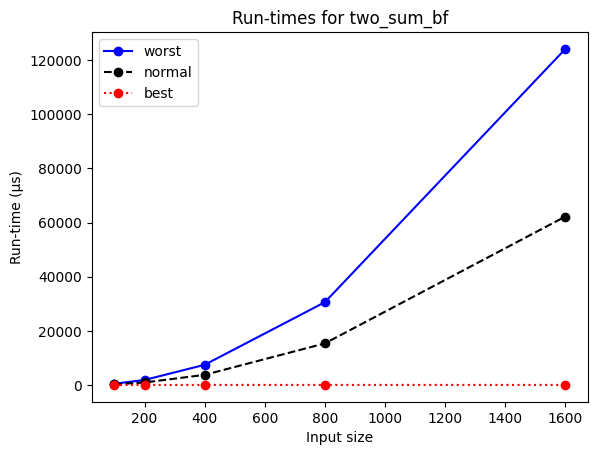

In [8]:
input_generators = [worst, normal, best]
time_cases(two_sum_bf, input_generators, start=100, double=4, chart=True)

We can see from the chart and run-times above, that our analysis of quadratic
time complexity for the worst-case seems to line up with the data. As we double
the input size, the run-times quadruple. For the best case, the run-times
generally stay the same for increasing inputs suggesting constant time
complexity. The normal case is somewhere in the middle of the two.

Now let us do the same for `two_sum_map`.

Run-times for two_sum_map

Input size           worst          normal            best 
       100             5.6             3.0             0.3 µs
       200            11.0             5.7             0.3 µs
       400            22.6            11.1             0.3 µs
       800            46.6            22.6             0.3 µs
      1600            92.9            46.1             0.3 µs

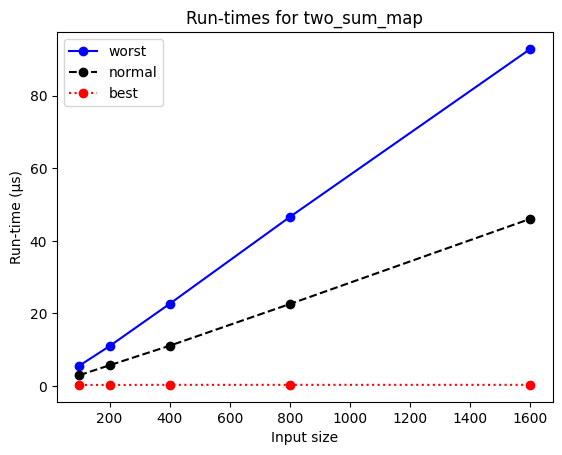

In [9]:
input_generators = [worst, normal, best]
time_cases(two_sum_map, input_generators, start=100, double=4, chart=True)

The first thing to note is the dramatic reduction in size of the run-times. The
scales on the y-axis differ by orders of magnitude. Also, the plot for our
worst-case on this chart has a much straighter line with run-times doubling in
proportion with input size. This aligns with our prediction of linear time
complexity.

### 4.3 Run-times for each solution

Let us now compare the worst-case run-times for all three solutions side by side.

Inputs generated by worst

Input size      two_sum_bf    two_sum_sort     two_sum_map 
       100           454.0            14.4             5.6 µs
       200          1805.4            28.4            11.0 µs
       400          7469.5            57.6            22.6 µs
       800         30776.4           116.9            45.9 µs
      1600        124944.8           237.3            93.0 µs

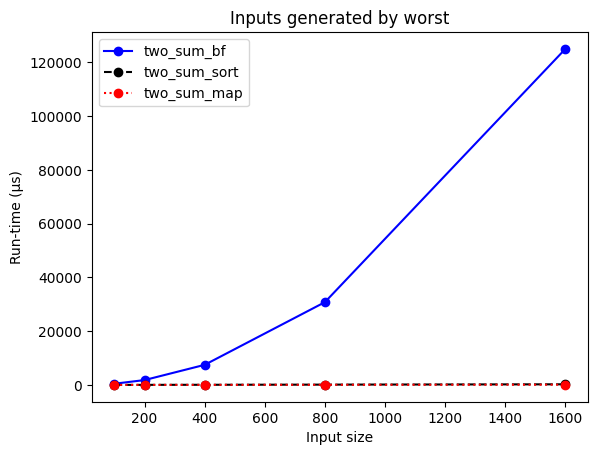

In [10]:
solutions = [two_sum_bf, two_sum_sort, two_sum_map]
time_functions(solutions, worst, start=100, double=4, chart=True)

The run-times for `two_sum_bf` almost instantly eclipse that of `two_sum_sort`
and `two_sum_map`.On the chart it looks as if the run-times for `two_sum_sort`
and `two_sum_map` are not growing at all, but we know by looking at the
run-times above that this is not the case. Let us see if we can adjust the
inputs of `time_functions` so the growth rates of the fastest two functions
have a better visual representation in the chart.

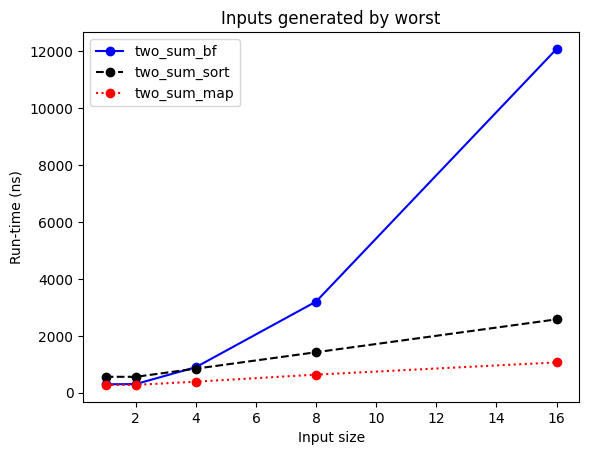

In [11]:
solutions = [two_sum_bf, two_sum_sort, two_sum_map]
time_functions(solutions, worst, start=1, double=4, text=False, chart=True)

The point at which the growth rates start to diverge is much clearer now. The
brute force approach's run-times still accelerate off into the stratosphere,
but we can see the separation and trend of the sorting and mapping algorithms.

## 5 Conclusion

We started this essay by defining the problem. We came up with three algorithms
that used different approaches: brute force, sorting and mapping, then analysed
the time complexity of each one. Next, we implemented and tested our solutions
using Python, and in the penultimate section used empirical testing to see if
our analysis matched the results. Now we must decide which of our algorithms is
best. 

The brute force approach, unsurprisingly, is not very efficient when it comes
to run-times. We suspected this would be the case, then the empirical testing
confirmed it. Its only positive attributes were its simplicity and efficient
memory usage. 

We are now left with a choice between the sorting and mapping approaches and I think 
there is a clear winner between the two. The mapping approach is more efficient
in its worst-case complexity with O(_n_) compared to O(_n_ log(_n_)) of the
sorting, and on the surface seems simpler and easier to implement. Moreover, the 
mapping approach has the potential to be more memory efficient. For example, the 
sorting approach always has an auxiliary data structure the same size as `nums`,
whereas the size of the dictionary will grow dynamically, only becoming the same 
size as `nums` in the worst case. Therefore, we must conclude the mapping algorithm 
is best. 